In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# My Tools
from toolkit.tools import (
    print_column_uniques,
    make_df,
    get_column_uniques,
    explode_pie,
    percentage_to_normal,
    get_color,
    replace_column_content
)

# replace_column_content(df,'column',dict)

%matplotlib inline

In [2]:
font = {
    "family": "normal",
    #'weight' : 'bold',
    "size": 22,
}


plt.rcParams["figure.figsize"] = [12, 7]
plt.rc("font", **font)


plt.style.use("dark_background")

In [3]:
sns.set()

In [4]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

# GENDER
- Possible 'popular assumptions' regarding gender, within the IT industry, are explored. (Based on job searches where gender is specified.)

In [47]:
df['genero'].value_counts().keys()

Index(['Male', 'Female', 'I do not share.'], dtype='object')

- GENERAL

In [48]:
df["genero"].shape

(342,)

In [49]:
df["genero"].isna().sum()

8

In [50]:
df["genero"].value_counts()

Male               279
Female              49
I do not share.      6
Name: genero, dtype: int64

In [51]:
df["genero"].value_counts().keys()

Index(['Male', 'Female', 'I do not share.'], dtype='object')

In [52]:
df["genero"].value_counts(normalize=True)

Male               0.835329
Female             0.146707
I do not share.    0.017964
Name: genero, dtype: float64

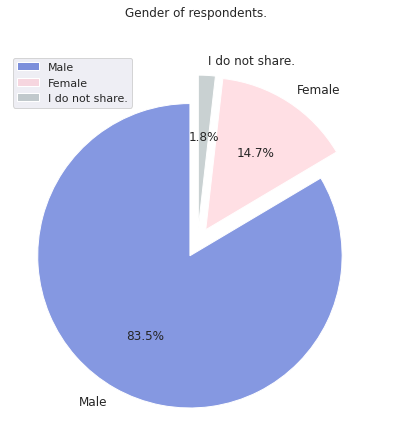

In [53]:
g_df = df["genero"].value_counts(normalize=True)
g_plot = g_df.plot(
    kind="pie",
    title="Gender of respondents. \n\n",
    ylabel="",
    explode=(0.1, 0.1, 0.1),
    startangle=90,
    legend=True,
    colors=[get_color(i, "light") for i in g_df.keys()],
    autopct="%1.1f%%",
    textprops={"fontsize": 12},
)

In [13]:
gnro = percentage_to_normal(df["genero"].value_counts(normalize=True))
print(gnro)

Male               83.5 %
Female             14.7 %
I do not share.     1.8 %
Name: genero, dtype: object


### GENDER by AGE

In [14]:
edades = [i for i in df["edad_actual"].value_counts().keys()]

edades_agrupadas = df.groupby("edad_actual")
edades

['30-34',
 '25-29',
 '35-39',
 '20-24',
 '40-44',
 '15-19',
 '45-49',
 '55-59',
 '50-54']

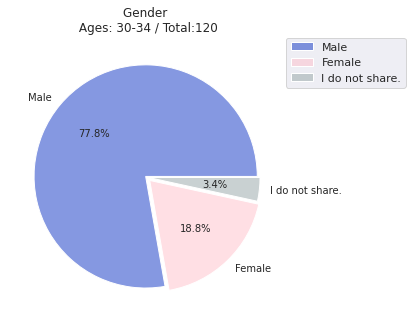

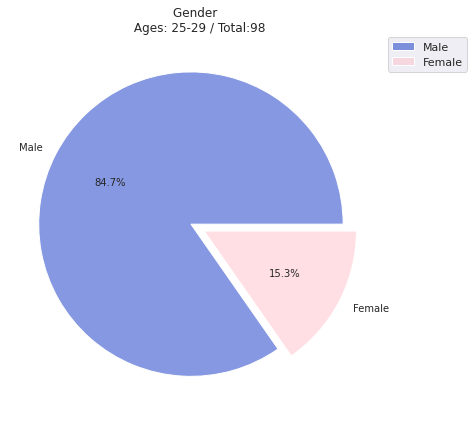

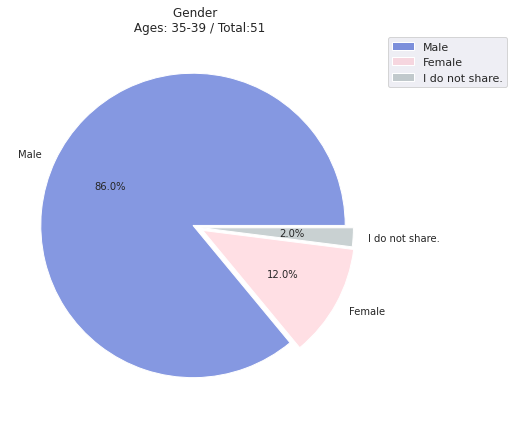

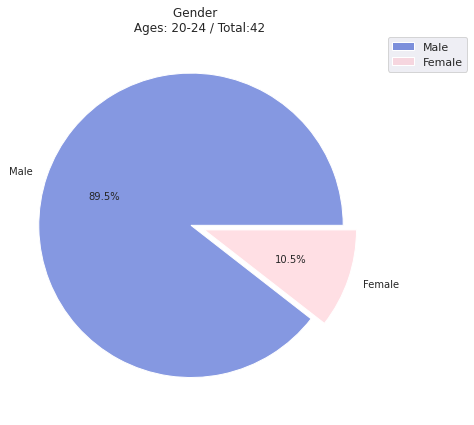

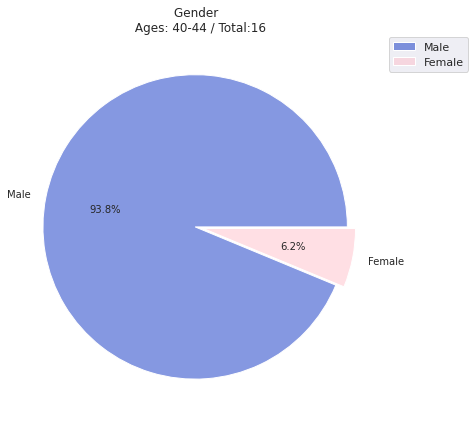

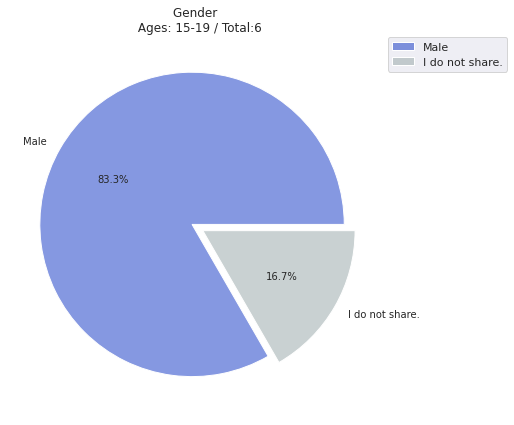

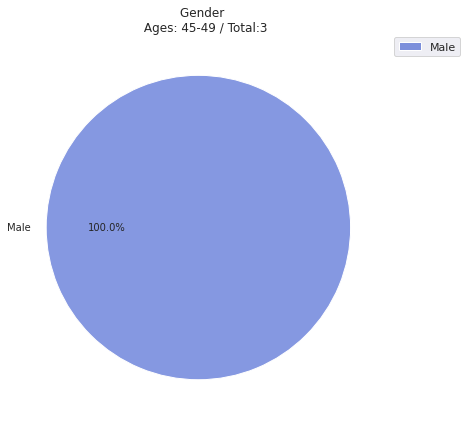

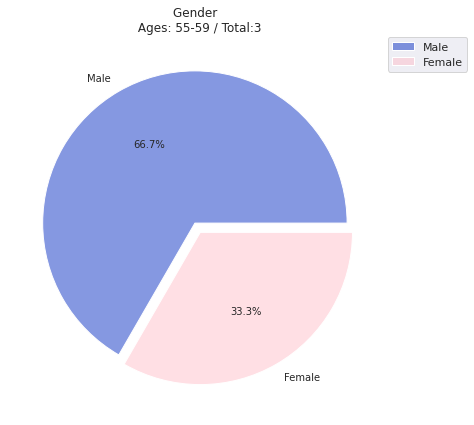

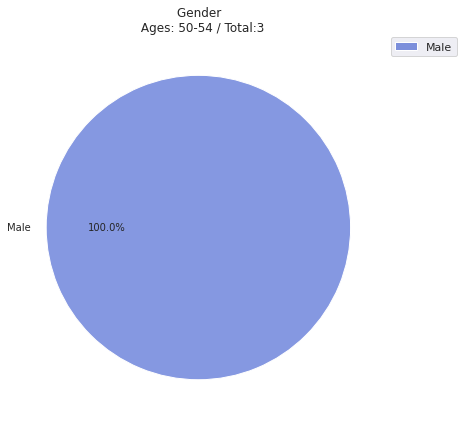

In [15]:
plt.figure(figsize=(5, 10))

for k, v in enumerate(edades):
    # plt.subplot(5, 2, k + 1)

    genero_df = edades_agrupadas.get_group(v)["genero"].value_counts(normalize=True)
    genero_df.plot(
        kind="pie",
        title="Gender \n Ages: {0} / Total:{1}".format(
            v, edades_agrupadas.get_group(v)["genero"].shape[0]
        ),
        ylabel="",
        autopct="%1.1f%%",
        legend=True,
        colors=[get_color(i, "light") for i in genero_df.keys()],
        explode=explode_pie(genero_df.size),
        textprops={"fontsize": 10},
    )
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0)

    plt.show()


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [16]:
for k, v in enumerate(edades):
    print(
        "> Gender - {0} - C|{1} \n{2} \n==============================================\n".format(
            v,
            edades_agrupadas.get_group(v)["genero"].shape[0],
            percentage_to_normal(
                edades_agrupadas.get_group(v)["genero"].value_counts(normalize=True)
            ),
        )
    )

> Gender - 30-34 - C|120 
Male               77.8 %
Female             18.8 %
I do not share.     3.4 %
Name: genero, dtype: object 

> Gender - 25-29 - C|98 
Male      84.7 %
Female    15.3 %
Name: genero, dtype: object 

> Gender - 35-39 - C|51 
Male               86.0 %
Female             12.0 %
I do not share.     2.0 %
Name: genero, dtype: object 

> Gender - 20-24 - C|42 
Male      89.5 %
Female    10.5 %
Name: genero, dtype: object 

> Gender - 40-44 - C|16 
Male      93.8 %
Female     6.2 %
Name: genero, dtype: object 

> Gender - 15-19 - C|6 
Male               83.3 %
I do not share.    16.7 %
Name: genero, dtype: object 

> Gender - 45-49 - C|3 
Male    100.0 %
Name: genero, dtype: object 

> Gender - 55-59 - C|3 
Male      66.7 %
Female    33.3 %
Name: genero, dtype: object 

> Gender - 50-54 - C|3 
Male    100.0 %
Name: genero, dtype: object 



### GENDER by Profession

In [17]:
generos = df.groupby("genero")

 #### Male vs Profession

In [18]:
hombres_df = generos.get_group("Male")

In [19]:
ed = None

               Categories  total
0    Aps para Esc. o Emp.     62
1                DB Admin     61
2            Project Lead     53
3  Dev de sist. embebidos     20
4          Dev full-stack    142
5              Dev mobile     49
6            QA o testing     23
7           Dev front-end     87
8            Dev back-end    121
9      Dev de videojuegos      3






<Figure size 648x432 with 0 Axes>

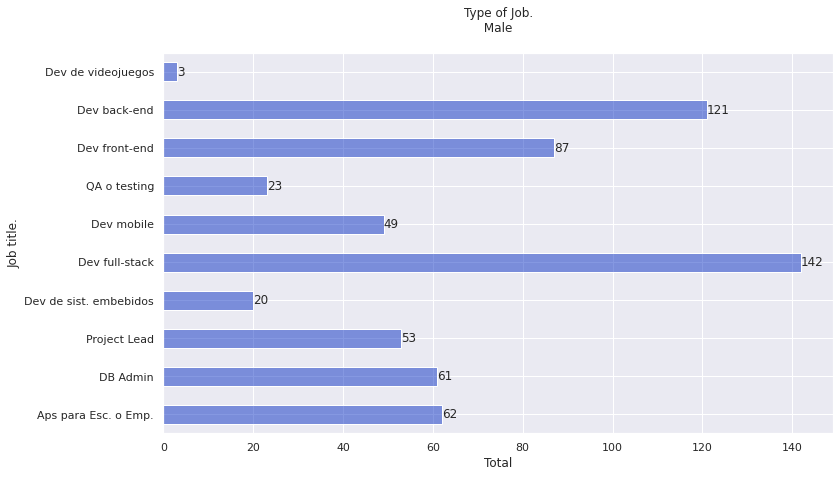

In [20]:
fig = plt.figure(figsize=(9, 6))

tipo_trabajo_df = make_df(
    generos.get_group("Male"), "tipo_de_trabajo", "Categories", "total"
)
print(tipo_trabajo_df)
print("\n" * 3)

tipo_trabajo_plot = tipo_trabajo_df.plot(
    kind="barh",
    title="Type of Job.\n Male \n",
    ylabel="Total",
    xlabel="Categories",
    legend=False,
    color=get_color("Male", "light"),
)

tipo_trabajo_plot.set_xlabel("Total")
tipo_trabajo_plot.set_ylabel("Job title.")


tipo_trabajo_plot.set_yticklabels([i for i in tipo_trabajo_df["Categories"]])


for k, v in enumerate([i for i in tipo_trabajo_df["total"]]):
    tipo_trabajo_plot.annotate(v, (v, k), va="center")

plt.show()

In [21]:
tipo_trabajo_df

,Categories,total
0,Aps para Esc. o Emp.,62
1,DB Admin,61
2,Project Lead,53
3,Dev de sist. embebidos,20
4,Dev full-stack,142
5,Dev mobile,49
6,QA o testing,23
7,Dev front-end,87
8,Dev back-end,121
9,Dev de videojuegos,3


#### Women

<Figure size 648x432 with 0 Axes>

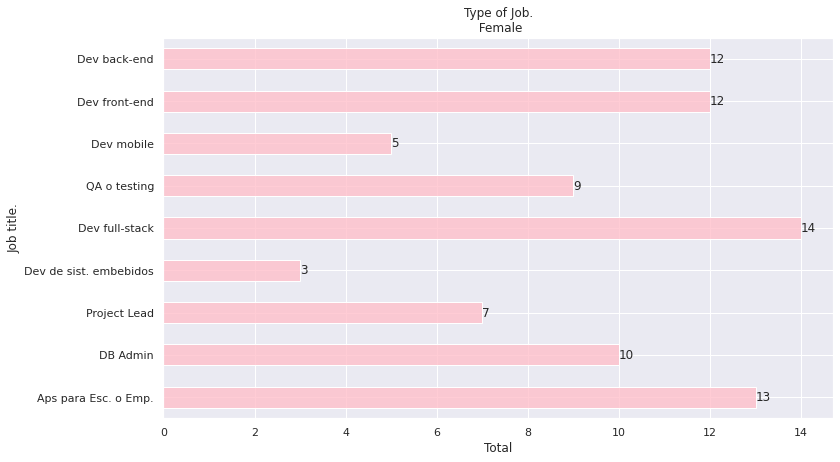

In [22]:
fig = plt.figure(figsize=(9, 6))

mujer_tipo_trabajo_df = make_df(
    generos.get_group("Female"), "tipo_de_trabajo", "Categories", "total"
)


mujer_tipo_trabajo_plot = mujer_tipo_trabajo_df.plot(
    kind="barh",
    title="Type of Job.\n Female",
    legend=False,
    color=get_color("Female", "dark"),
)
mujer_tipo_trabajo_plot.set_ylabel("Job title.")
mujer_tipo_trabajo_plot.set_xlabel("Total")

mujer_tipo_trabajo_plot.set_yticklabels(
    [i for i in mujer_tipo_trabajo_df["Categories"]]
)


for k, v in enumerate([i for i in mujer_tipo_trabajo_df["total"]]):
    mujer_tipo_trabajo_plot.annotate(v, (v, k), va="center")

plt.show()

# Type of job. Male vs. Female

In [23]:
generos.groups.keys()

dict_keys(['Female', 'I do not share.', 'Male'])

<Figure size 1200x2400 with 0 Axes>

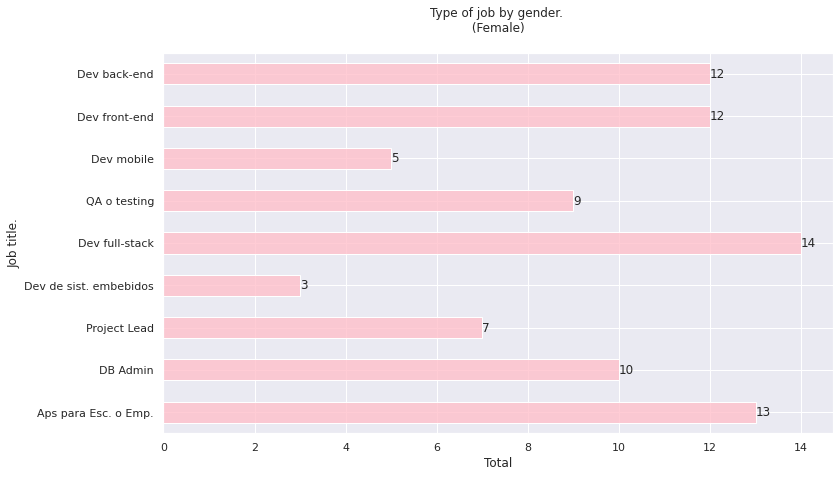

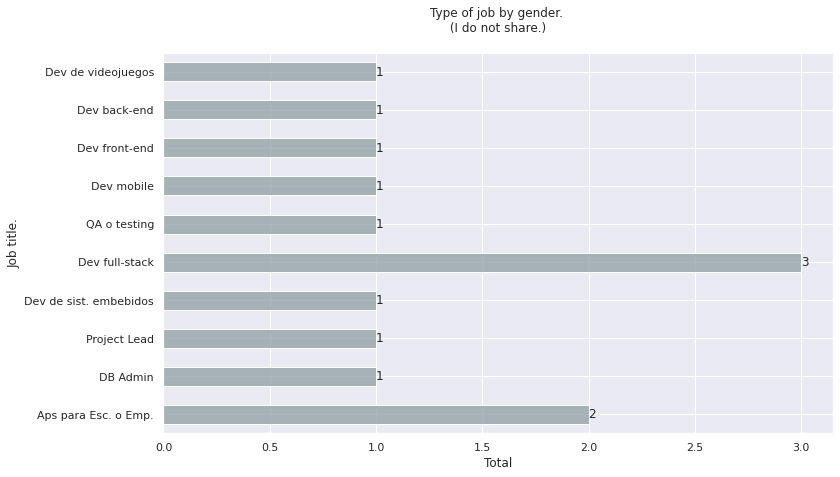

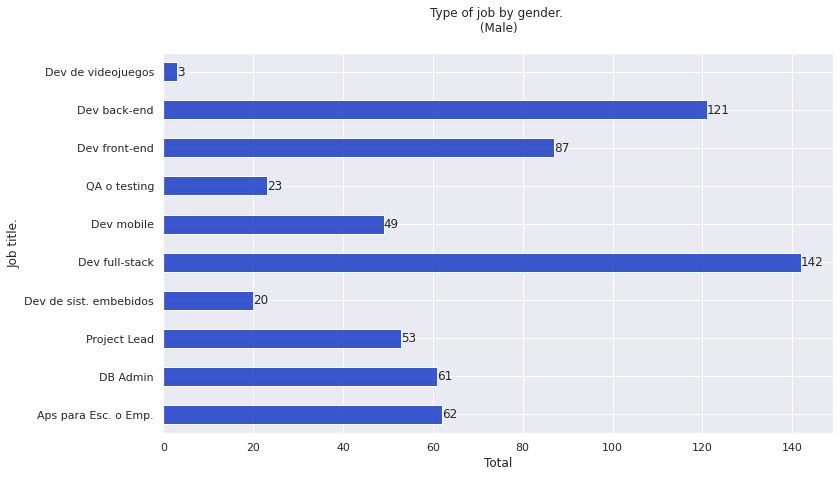

In [24]:
plt.figure(figsize=(15, 30), dpi=80)
g = [i for i in generos.groups.keys()]

for k, v in enumerate(g):
    # plt.subplot(20, 3, k + 1)
    ax_df = make_df(generos.get_group(v), "tipo_de_trabajo", "Categories", "Total")
    ax_df_plot = ax_df.plot(
        kind="barh",
        title=f"Type of job by gender. \n ({v}) \n",
        color=get_color(v, "dark"),
        legend=False,
    )
    ax_df_plot.set_ylabel("Job title.")
    ax_df_plot.set_xlabel("Total")

    ax_df_plot.set_yticklabels([i for i in ax_df["Categories"]])

    for k, v in enumerate([i for i in ax_df["Total"]]):
        ax_df_plot.annotate(v, (v, k), va="center")

    plt.show()


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.5)

<Figure size 1200x4000 with 0 Axes>

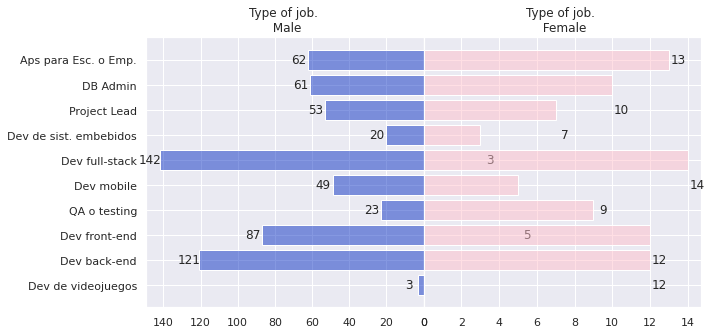

In [25]:
plt.figure(figsize=(15, 50), dpi=80)
g = [i for i in generos.groups.keys()]

male_df = make_df(generos.get_group("Male"), "tipo_de_trabajo", "Categories", "Total")
female_df = make_df(
    generos.get_group("Female"), "tipo_de_trabajo", "Categories", "Total"
)

male_ch_values = [i for i in male_df["Total"]]
female_ch_values = [i for i in female_df["Total"]]
female_ch_values.insert(1, 0)


fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)

# fig.tight_layout()


male_bar_plot = axes[0].barh(
    male_df["Categories"],
    male_df["Total"],
    align="center",
    color=get_color("Male", "light"),
    zorder=10,
)


for i, value in enumerate(male_ch_values):
    axes[0].text(value + 5, i, str(value), ha="center", va="center")


female_bar_plot = axes[1].barh(
    female_df["Categories"],
    female_df["Total"],
    align="center",
    color=get_color("Female", "light"),
    zorder=10,
)

for i, value in enumerate(female_ch_values):
    if value != 0:
        axes[1].text(value + 0.5, i, str(value), ha="center", va="center")


# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
plt.gca().invert_yaxis()

# Setting titles.
axes[0].set_title("Type of job. \n Male")
axes[1].set_title("Type of job. \n Female")


plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


plt.show()

# IT Experience by Gender


#### Male

In [26]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [27]:
percentage_to_normal(
    generos.get_group("Male")["exp_en_IT"].value_counts(normalize=True)
)

5-9      35.1 %
<5       26.9 %
10-14    25.4 %
15-19     5.4 %
20-24     3.2 %
25-29     1.8 %
30-34     1.4 %
35-39     0.4 %
>50       0.4 %
Name: exp_en_IT, dtype: object

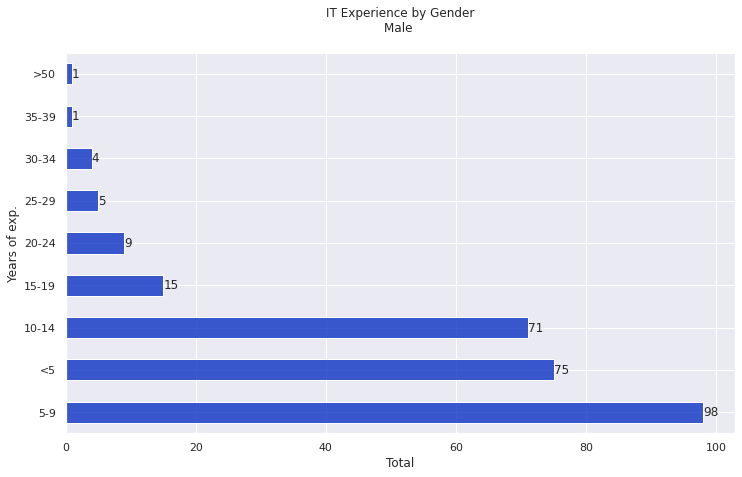

In [28]:
exp_it_g_df = generos.get_group("Male")["exp_en_IT"].value_counts()
exp_it_g_plot = exp_it_g_df.plot(
    kind="barh",
    color=get_color("Male", "dark"),
    title="IT Experience by Gender\nMale \n",
)

exp_it_g_plot.set_xlabel("Total")
exp_it_g_plot.set_ylabel("Years of exp.")

for k, v in enumerate(exp_it_g_df):
    exp_it_g_plot.annotate(v, (v, k), va="center")

#### Female

In [29]:
exp_it_mujeres_df = generos.get_group("Female")["exp_en_IT"].value_counts(
    normalize=True
)

In [30]:
percentage_to_normal(exp_it_mujeres_df)

5-9      46.9 %
<5       28.6 %
10-14    14.3 %
15-19     8.2 %
35-39     2.0 %
Name: exp_en_IT, dtype: object

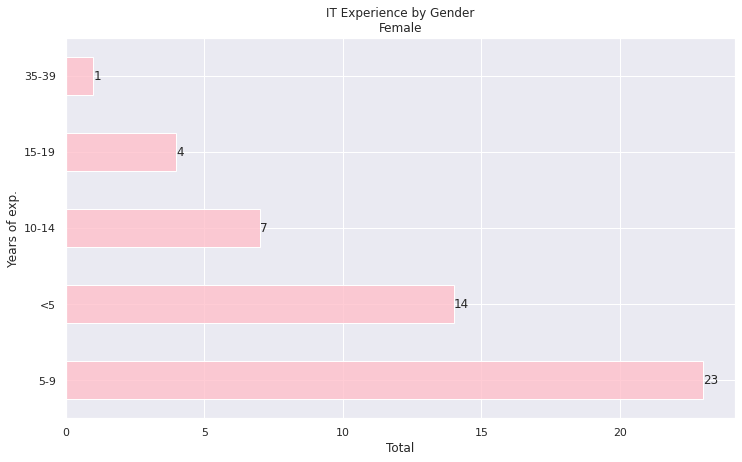

In [31]:
exp_it_muj_df = generos.get_group("Female")["exp_en_IT"].value_counts()
exp_it_muj_plot = exp_it_muj_df.plot(
    kind="barh",
    color=get_color("Female", "Dark"),
    title="IT Experience by Gender\nFemale",
)
exp_it_muj_plot.set_xlabel("Total")
exp_it_muj_plot.set_ylabel("Years of exp.")

for k, v in enumerate(exp_it_muj_df):
    exp_it_muj_plot.annotate(v, (v, k), va="center")

### NO COMPARTO

In [32]:
percentage_to_normal(
    generos.get_group("I do not share.")["exp_en_IT"].value_counts(normalize=True)
)

<5       33.3 %
10-14    33.3 %
5-9      16.7 %
45-49    16.7 %
Name: exp_en_IT, dtype: object

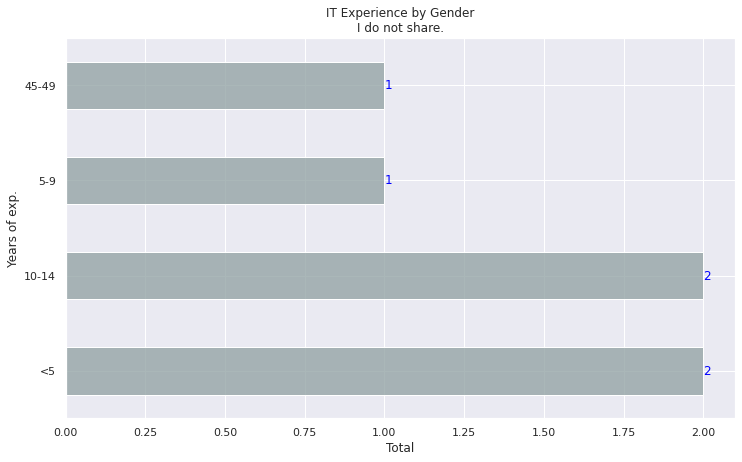

In [33]:
exp_noc_df = generos.get_group("I do not share.")["exp_en_IT"].value_counts()
exp_noc_plot = exp_noc_df.plot(
    kind="barh",
    color=get_color("I do not share.", "dark"),
    title="IT Experience by Gender\nI do not share.",
)

exp_noc_plot.set_xlabel("Total")
exp_noc_plot.set_ylabel("Years of exp.")

for k, v in enumerate(exp_noc_df):
    exp_noc_plot.annotate(v, (v, k), va="center", color="blue")

# IT experience - Comparison by gender.

In [34]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

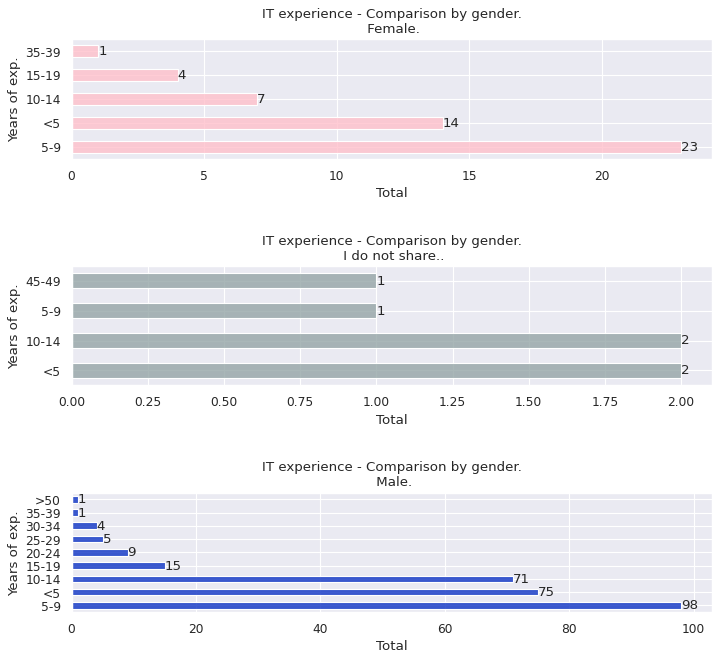

In [35]:
plt.figure(figsize=(10, 30), dpi=80)


g = [i for i in generos.groups.keys()]

for k, v in enumerate(g):
    plt.subplot(10, 1, k + 1)
    exp_df = generos.get_group(v)["exp_en_IT"].value_counts(normalize=False)
    exp_plot = exp_df.plot(
        kind="barh",
        title=f"IT experience - Comparison by gender.\n {v}.",
        color=get_color(v, "dark"),
        xlabel="Years of exp.",
    )
    exp_plot.set_xlabel("Total")
    exp_plot.set_ylabel("Years of exp.")

    for k, v in enumerate(exp_df):
        exp_plot.annotate(v, (v, k), va="center")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1, wspace=0.4, hspace=0.9)

### Current age by gender.

- Male

In [36]:
percentage_to_normal(
    generos.get_group("Male")["edad_actual"].value_counts(normalize=True)
)

30-34    32.6 %
25-29    29.7 %
35-39    15.4 %
20-24    12.2 %
40-44     5.4 %
15-19     1.8 %
45-49     1.1 %
50-54     1.1 %
55-59     0.7 %
Name: edad_actual, dtype: object

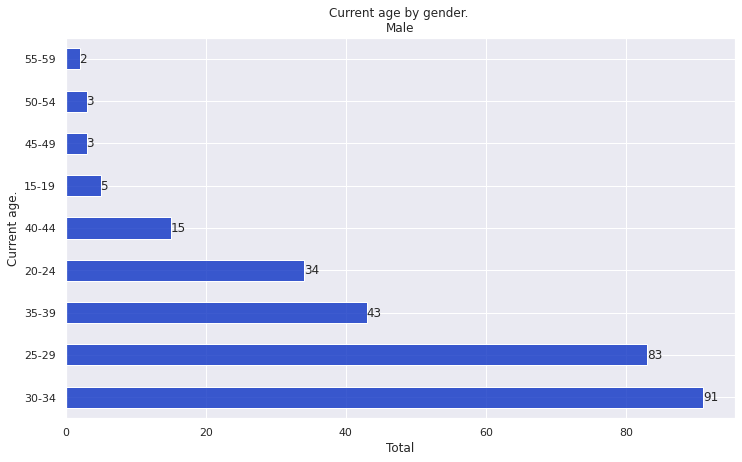

In [37]:
ed_hombres_df = generos.get_group("Male")["edad_actual"].value_counts()
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh", title="Current age by gender. \nMale", color=get_color("Male", "dark")
)

ed_hombres_plot.set_xlabel("Total")
ed_hombres_plot.set_ylabel("Current age.")

for k, v in enumerate(ed_hombres_df):
    ed_hombres_plot.annotate(v, (v, k), va="center")

- Female

In [38]:
percentage_to_normal(
    generos.get_group("Female")["edad_actual"].value_counts(normalize=True)
)

30-34    44.9 %
25-29    30.6 %
35-39    12.2 %
20-24     8.2 %
55-59     2.0 %
40-44     2.0 %
Name: edad_actual, dtype: object

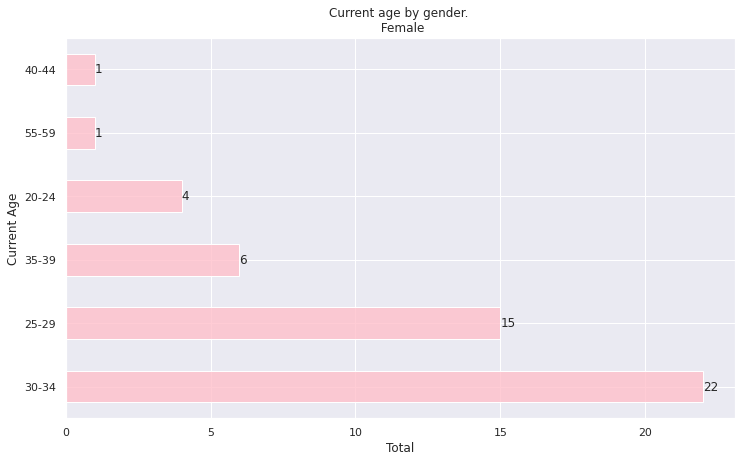

In [39]:
muj_ed_actual_df = generos.get_group("Female")["edad_actual"].value_counts()
muj_ed_actual_plot = muj_ed_actual_df.plot(
    kind="barh",
    title="Current age by gender. \n Female",
    color=get_color("Female", "dark"),
)
muj_ed_actual_plot.set_xlabel("Total")
muj_ed_actual_plot.set_ylabel("Current Age")


for k, v in enumerate(muj_ed_actual_df):
    muj_ed_actual_plot.annotate(v, (v, k), va="center")

- I DO NOT SHARE

In [40]:
percentage_to_normal(
    generos.get_group("I do not share.")["edad_actual"].value_counts(normalize=True)
)

30-34    66.7 %
35-39    16.7 %
15-19    16.7 %
Name: edad_actual, dtype: object

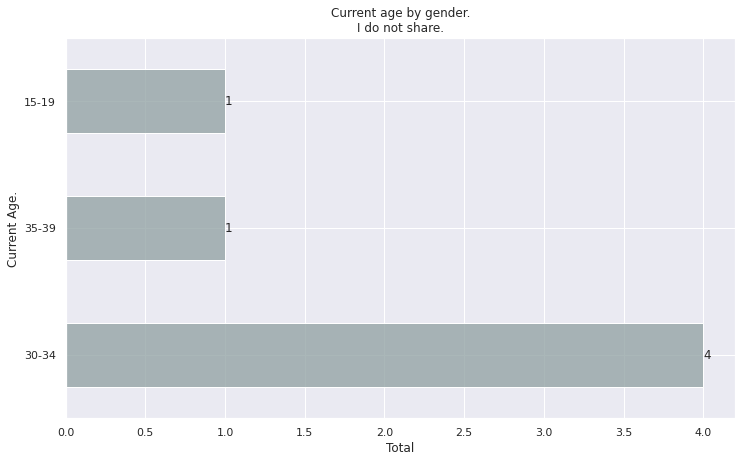

In [41]:
noc_ed_df = generos.get_group("I do not share.")["edad_actual"].value_counts()
moc_ed_plot = noc_ed_df.plot(
    kind="barh",
    title="Current age by gender.\nI do not share.",
    color=get_color("I do not share.", "dark"),
)
moc_ed_plot.set_xlabel("Total")
moc_ed_plot.set_ylabel("Current Age.")


for k, v in enumerate(noc_ed_df):
    moc_ed_plot.annotate(v, (v, k), va="center")

# Comparison "current age" vs "gender".

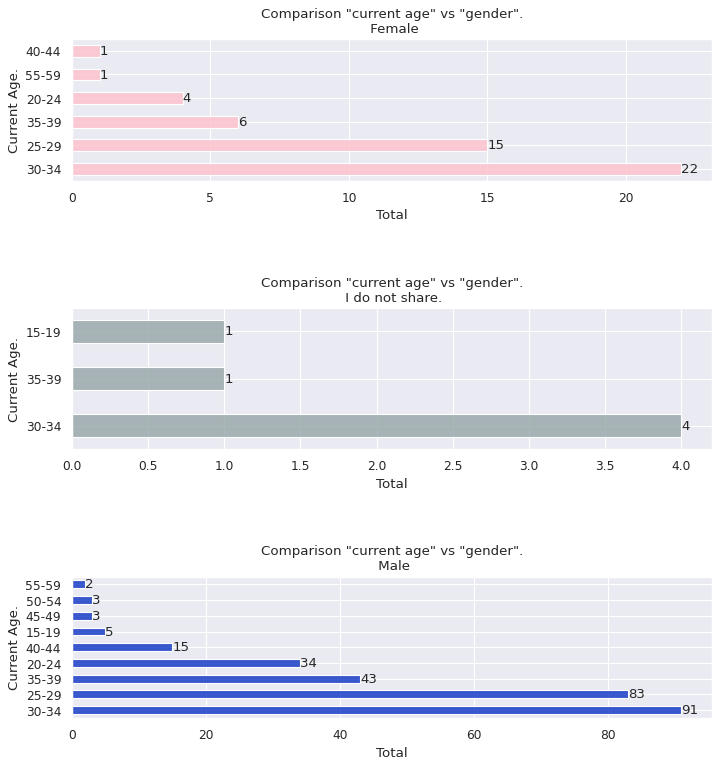

In [42]:
plt.figure(figsize=(10, 40), dpi=80)


g = [i for i in generos.groups.keys()]

for k, v in enumerate(g):
    plt.subplot(10, 1, k + 1)
    gen_ed_df = generos.get_group(v)["edad_actual"].value_counts()
    gen_ed_plot = gen_ed_df.plot(
        kind="barh",
        title=f'Comparison "current age" vs "gender".\n {v}',
        color=get_color(v, "dark"),
    )
    gen_ed_plot.set_xlabel("Total")
    gen_ed_plot.set_ylabel("Current Age.")

    for k, v in enumerate(gen_ed_df):
        gen_ed_plot.annotate(v, (v, k), va="center")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.9)

# IT experience vs. Current age by gender.

In [43]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [44]:
ee_group = df.groupby(["exp_en_IT", "edad_actual"])  # [primero, segundo]

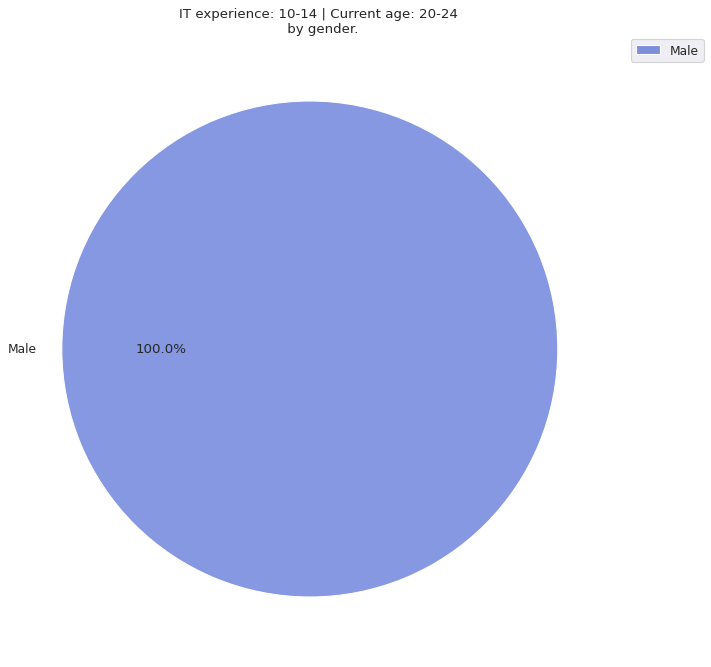

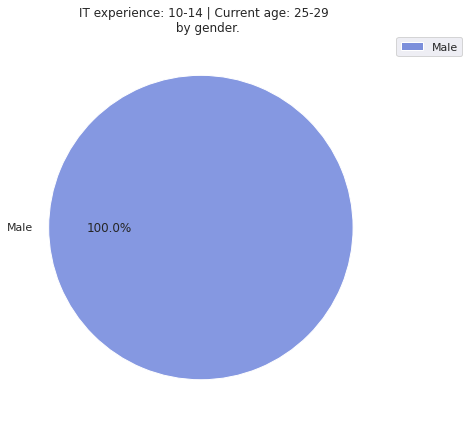

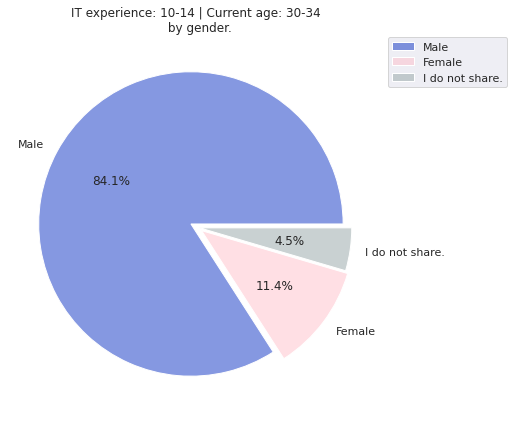

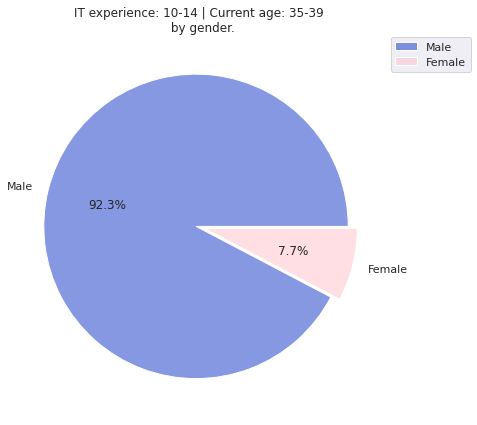

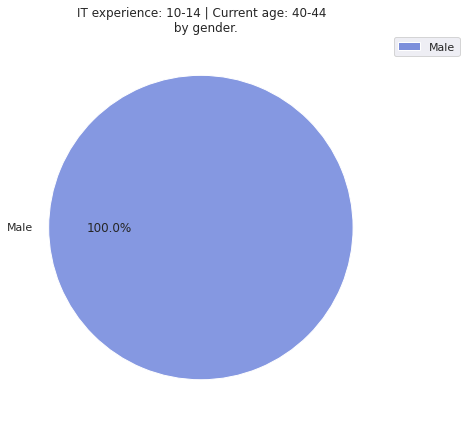

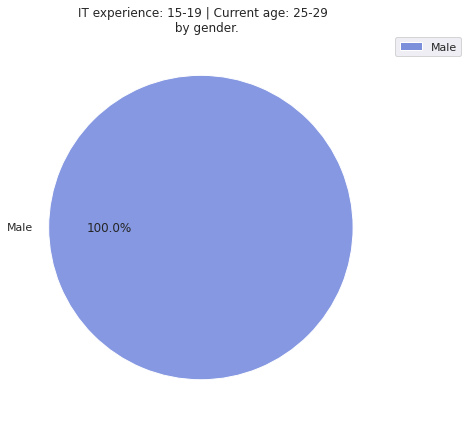

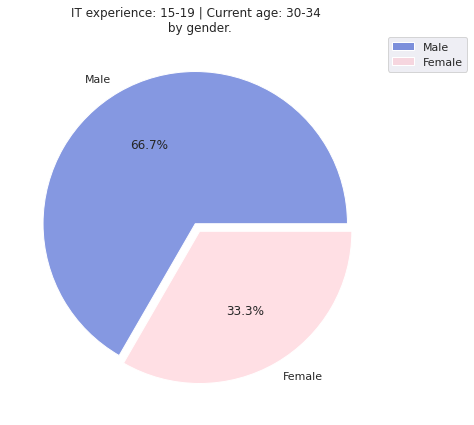

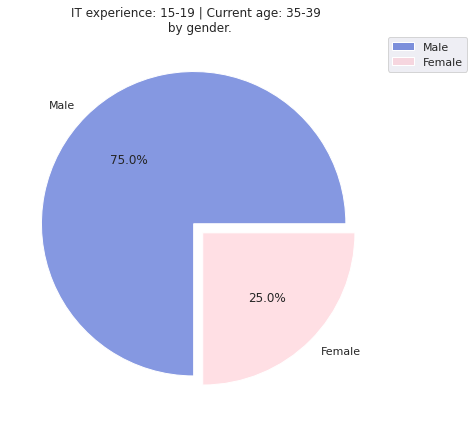

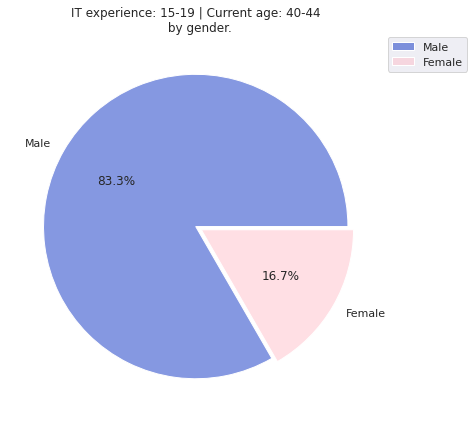

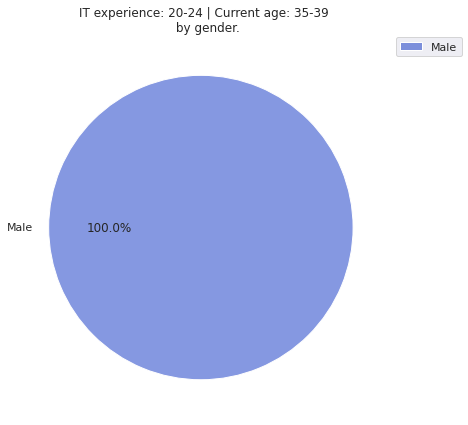

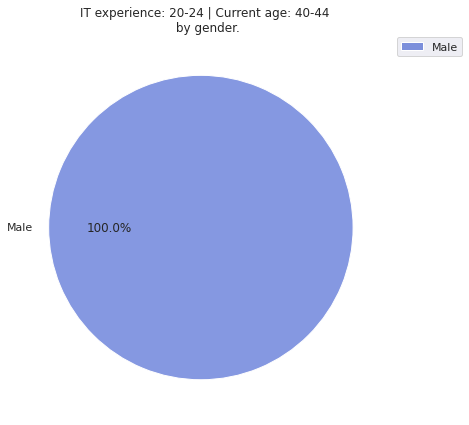

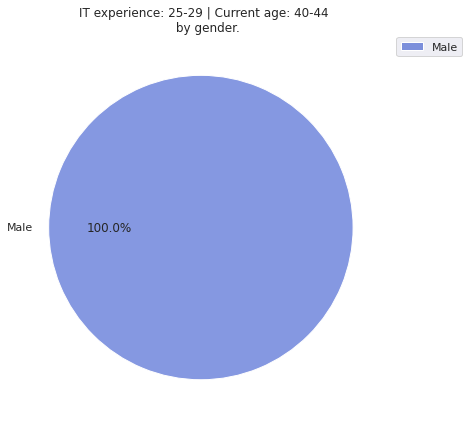

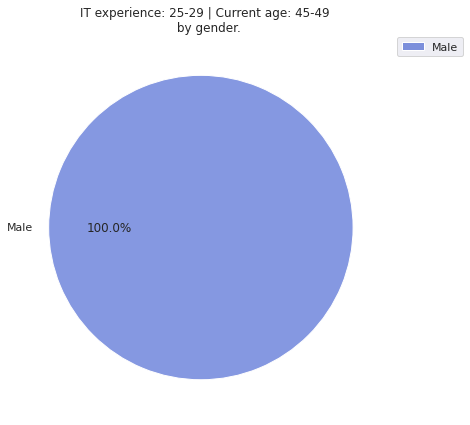

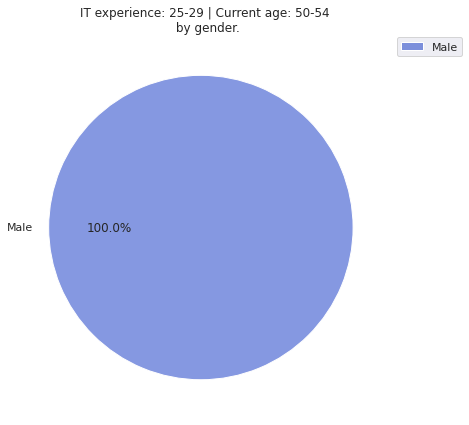

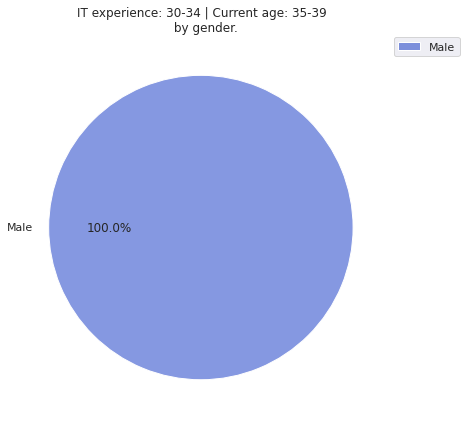

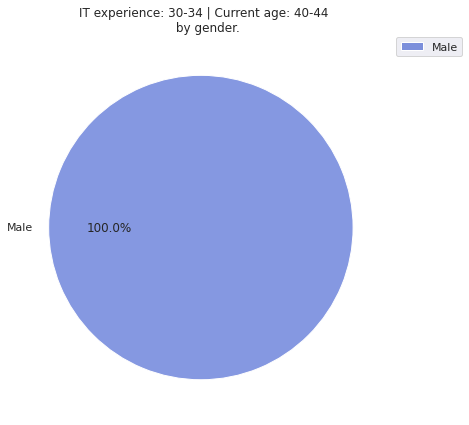

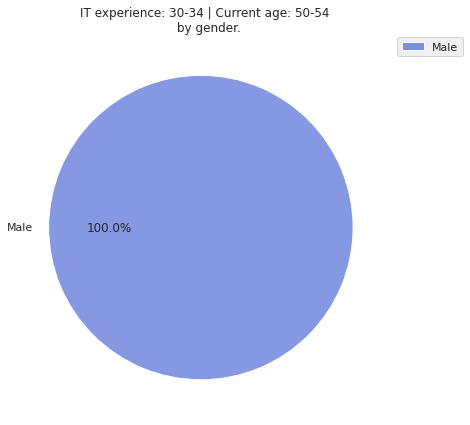

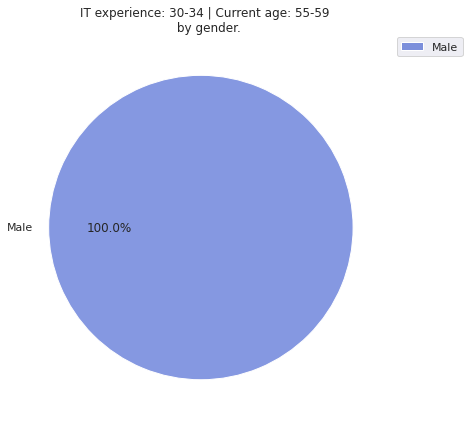

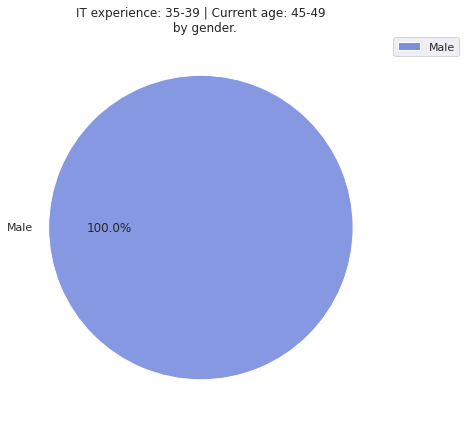

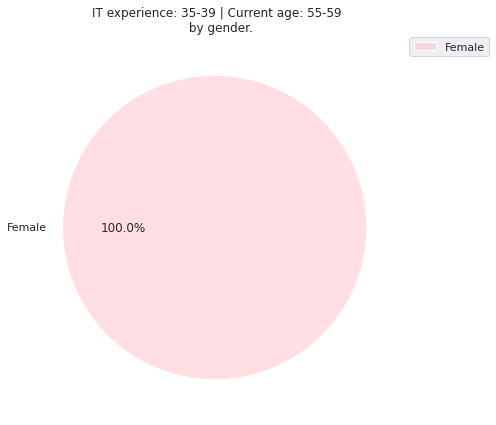

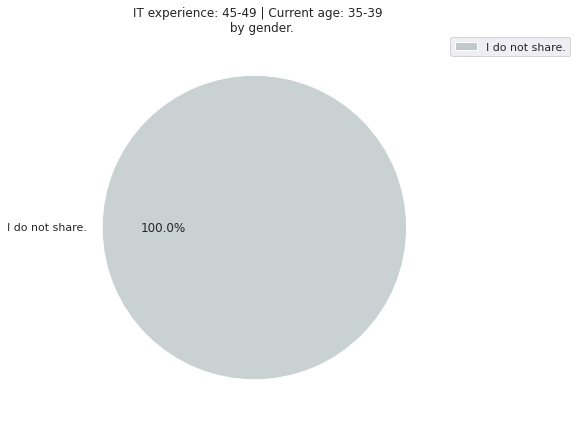

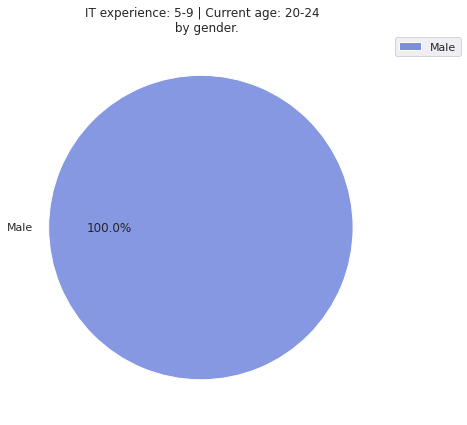

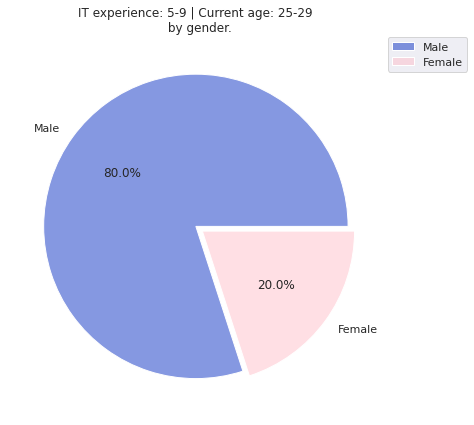

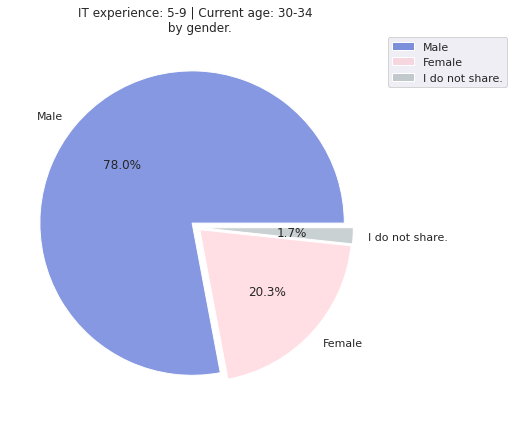

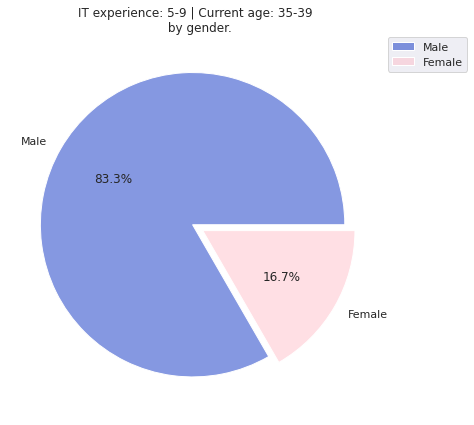

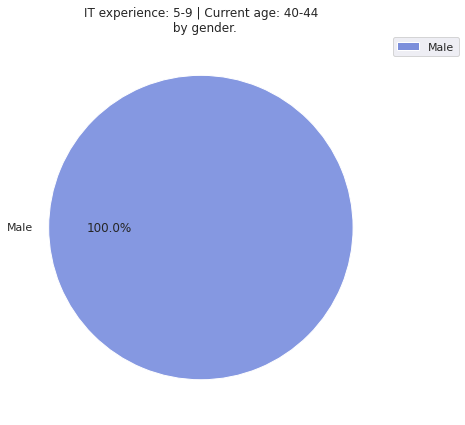

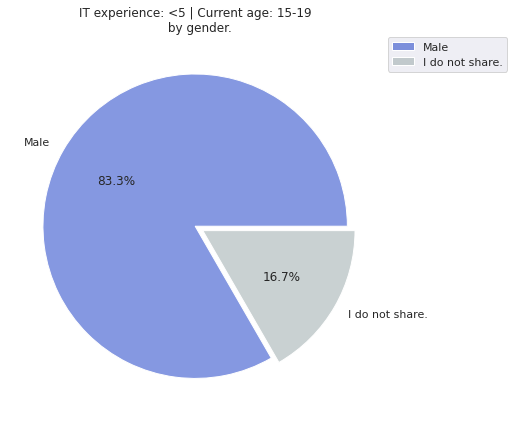

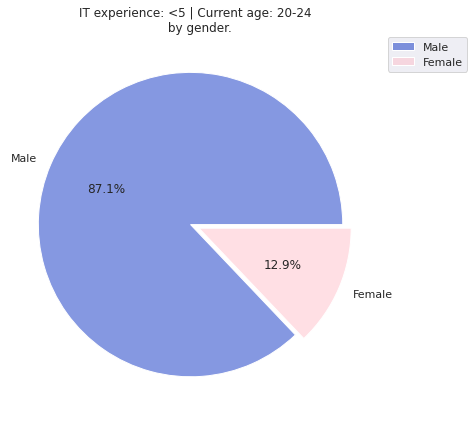

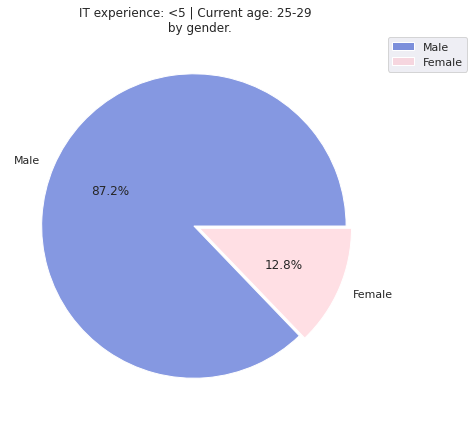

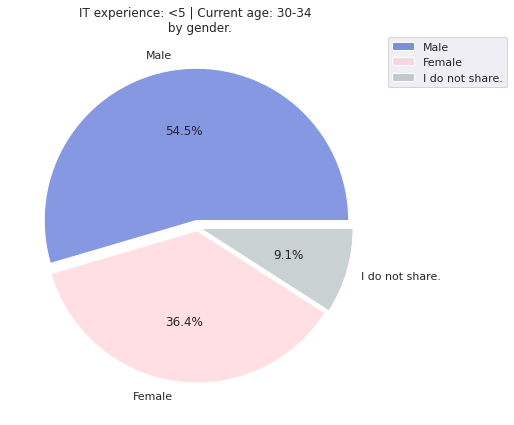

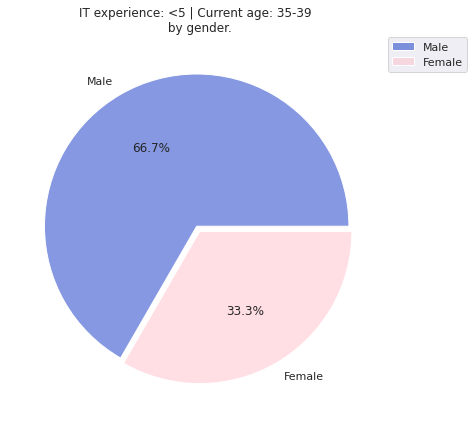

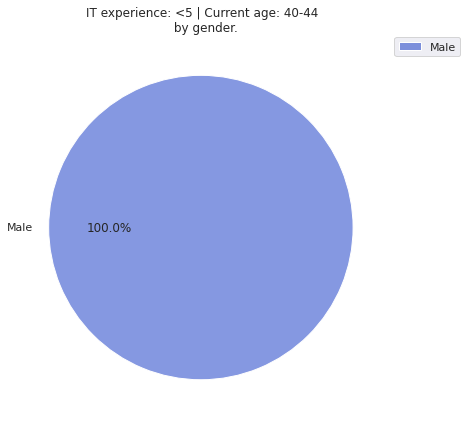

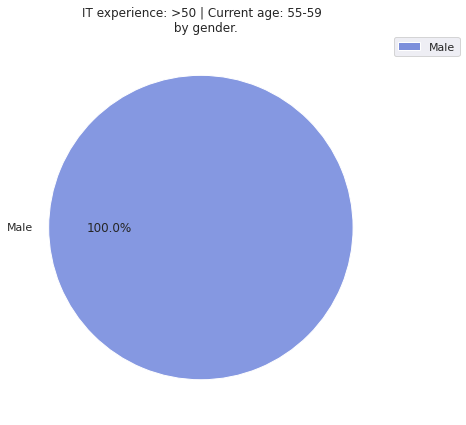

In [45]:
plt.figure(figsize=(10, 60), dpi=80)

colors = [
    get_color("Male", "dark"),
    get_color("Female", "dark"),
    get_color("I do not share.", "dark"),
]


for k, v in enumerate(ee_group.groups.keys()):
    # plt.subplot(45, 2, k + 1)
    exp_edad_df = ee_group.get_group(v)["genero"].value_counts(normalize=True)

    exp_edad_plot = exp_edad_df.plot(
        kind="pie",
        ylabel="",
        colors=[get_color(i, "light") for i in exp_edad_df.keys()],
        explode=explode_pie(exp_edad_df.size),
        autopct="%1.1f%%",
        title=f"IT experience: {v[0]} | Current age: {v[1]} \n by gender.",
    )
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0)
    plt.show()


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.9)

In [46]:
for k, v in enumerate(ee_group.groups.keys()):

    ee_aux_df = (
        ee_group.get_group(v)["genero"]
        .value_counts(normalize=True)
        .mul(100)
        .round(1)
        .astype(str)
        + " %"
    )
    title = f"IT experience:{v[0]}. vs. Current age: {v[1]} by gender."
    if ee_aux_df.size > 1:
        print(title)
        print("_" * 55)
        print(ee_aux_df)
        print("\n" * 3)

IT experience:10-14. vs. Current age: 30-34 by gender.
_______________________________________________________
Male               84.1 %
Female             11.4 %
I do not share.     4.5 %
Name: genero, dtype: object




IT experience:10-14. vs. Current age: 35-39 by gender.
_______________________________________________________
Male      92.3 %
Female     7.7 %
Name: genero, dtype: object




IT experience:15-19. vs. Current age: 30-34 by gender.
_______________________________________________________
Male      66.7 %
Female    33.3 %
Name: genero, dtype: object




IT experience:15-19. vs. Current age: 35-39 by gender.
_______________________________________________________
Male      75.0 %
Female    25.0 %
Name: genero, dtype: object




IT experience:15-19. vs. Current age: 40-44 by gender.
_______________________________________________________
Male      83.3 %
Female    16.7 %
Name: genero, dtype: object




IT experience:5-9. vs. Current age: 25-29 by gender.
__________________